In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/plant_disease.zip -d disease

Streaming output truncated to the last 5000 lines.
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug2.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug4.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug7.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345).jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug2.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug4.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug5.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug6.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346).jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346)_aug1.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346)_aug2.jpg  
 extracting: 

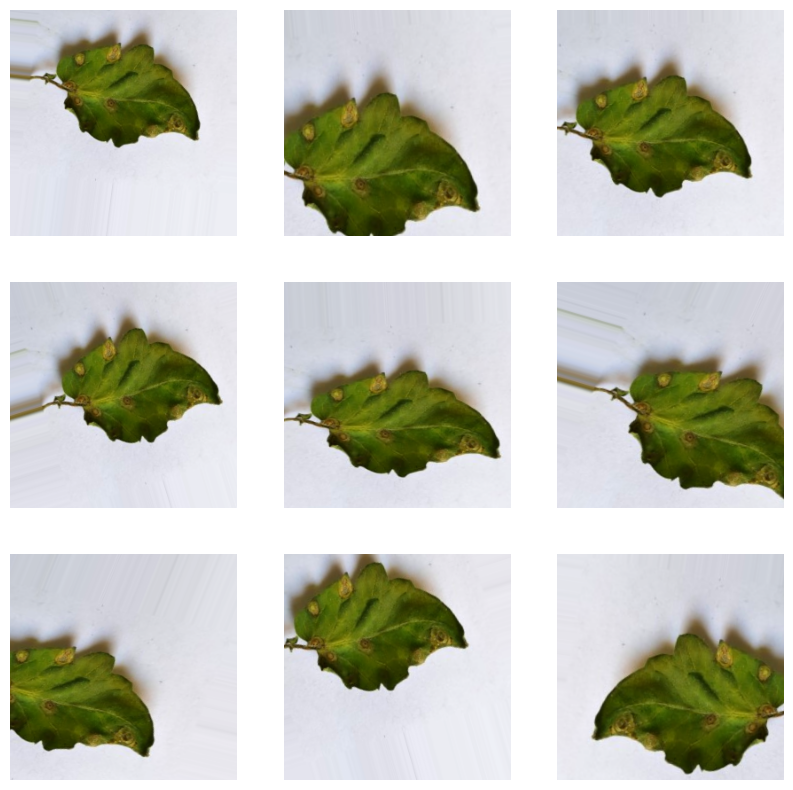

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image for visualization
sample_img_path = "/content/disease/plant_disease/A-Tomato__Early_blight/IMG20220323100125.jpg"  # Replace with an actual path to an image
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path)
sample_img_array = tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

# Generate augmented images and visualize them
num_augmented_images = 9
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i, augmented_img in enumerate(datagen.flow(sample_img_array, batch_size=1)):
    if i >= num_augmented_images:
        break

    ax[i // 3, i % 3].imshow(tf.keras.preprocessing.image.array_to_img(augmented_img[0]))
    ax[i // 3, i % 3].axis('off')

plt.show()


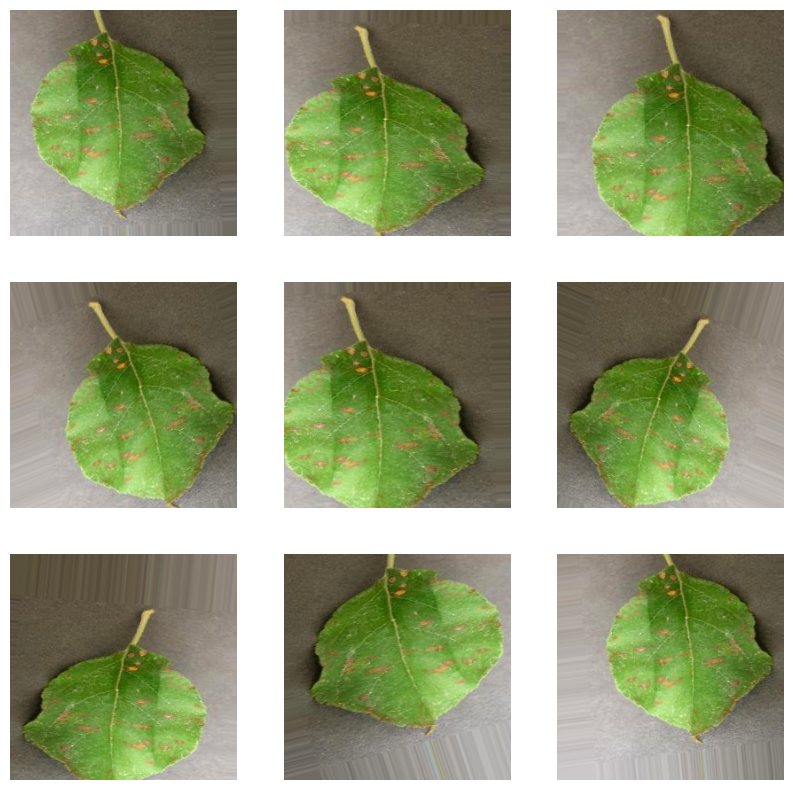

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image for visualization
sample_img_path = "/content/disease/plant_disease/Apple__Cedar Apple Rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_180deg.JPG"  # Replace with an actual path to an image
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path)
sample_img_array = tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

# Generate augmented images and visualize them
num_augmented_images = 9
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i, augmented_img in enumerate(datagen.flow(sample_img_array, batch_size=1)):
    if i >= num_augmented_images:
        break

    ax[i // 3, i % 3].imshow(tf.keras.preprocessing.image.array_to_img(augmented_img[0]))
    ax[i // 3, i % 3].axis('off')

plt.show()


Import neccessary packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the image dimensions and other parameters
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32


from PIL import Image
import os
def preprocess_images(directory):

      for filename in os.listdir(directory):
          filepath = os.path.join(directory, filename)
          try:
              img = Image.open(filepath)
              img = img.convert("RGB")
              img = img.resize((img_width, img_height))
              img.save(filepath)
          except Exception as e:
              print(f"Error processing image {filename}: {str(e)}")

# Preprocess images in the training and validation directories
for dir in os.listdir("/content/disease/plant_disease"):
  preprocess_images(os.path.join('disease','plant_disease',dir))


# Create data generator with data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 20242 images belonging to 21 classes.
Found 5058 images belonging to 21 classes.


In [ ]:
train_generator.class_indices

{'.ipynb_checkpoints': 0,
 'A-Tomato__Early_blight': 1,
 'A-Tomato__Healthy': 2,
 'A-Tomato__Late_blight': 3,
 'A-Tomato__Leaf Miner': 4,
 'A-Tomato__Nitrogen Deficiency': 5,
 'A-Tomato__Pottassium Deficiency': 6,
 'A-Tomato__Spotted Wilt Virus': 7,
 'Apple __Black Rot': 8,
 'Apple__Apple Scab': 9,
 'Apple__Cedar Apple Rust': 10,
 'Apple__Healthy': 11,
 'Cotton__Aphids': 12,
 'Cotton__Bacterial_Blight': 13,
 'Cotton__Healthy': 14,
 'Cotton__Powdery_Mildew': 15,
 'Cotton__Target_spot': 16,
 'Potato___Early_blight': 17,
 'Potato___Late_blight': 18,
 'Potato___healthy': 19,
 'cotton__Army_worm': 20}

In [ ]:
for image_batch,label_batch in train_generator:
  break
image_batch.shape,label_batch.shape

((32, 224, 224, 3), (32, 21))

#Custom Model

In [ ]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


<ipython-input-7-9aa07009f37e>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


633/633 [==============================] - 63s 89ms/step - loss: 1.0973 - accuracy: 0.6251 - val_loss: 0.7056 - val_accuracy: 0.7628
Epoch 2/10
633/633 [==============================] - 52s 82ms/step - loss: 0.5941 - accuracy: 0.7859 - val_loss: 0.5942 - val_accuracy: 0.7934
Epoch 3/10
633/633 [==============================] - 57s 90ms/step - loss: 0.4095 - accuracy: 0.8537 - val_loss: 0.5636 - val_accuracy: 0.7999
Epoch 4/10
633/633 [==============================] - 53s 84ms/step - loss: 0.2828 - accuracy: 0.9036 - val_loss: 0.5524 - val_accuracy: 0.8258
Epoch 5/10
633/633 [==============================] - 55s 87ms/step - loss: 0.1862 - accuracy: 0.9358 - val_loss: 0.6963 - val_accuracy: 0.8009
Epoch 6/10
633/633 [==============================] - 56s 88ms/step - loss: 0.1265 - accuracy: 0.9598 - val_loss: 0.6553 - val_accuracy: 0.8280
Epoch 7/10
633/633 [==============================] - 55s 87ms/step - loss: 0.1041 - accuracy: 0.9679 - val_loss: 0.6852 - val_accuracy: 0.8278
Epo

Model Summary

Plot the train and val curve

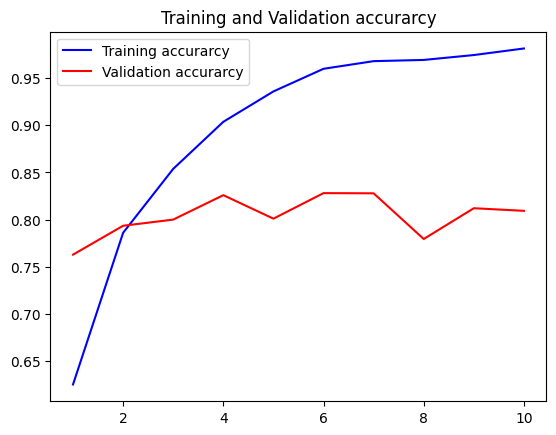

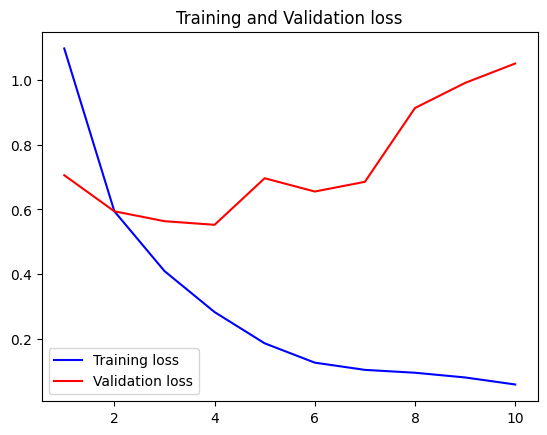

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#Using pretrained models

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2,VGG16,VGG19
from tensorflow.keras import layers, models

# Define constants
img_width, img_height = 224, 224
batch_size = 32

# Create data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load the datasets
train_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Function to create a model using a specific pre-trained base model
def create_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(train_generator.num_classes, activation='softmax'))
    return model

# Load pre-trained models

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create models based on each pre-trained model


for layer in vgg16_model.layers:
    layer.trainable = False

for layer in vgg19_model.layers:
    layer.trainable = False

for layer in resnet_model.layers:
    layer.trainable = False

#for layer in inception_model.layers:
#    layer.trainable = False

#for layer in mobilenet_model.layers:
#    layer.trainable = False

vgg16_transfer_model = create_model(vgg16_model)
vgg19_transfer_model = create_model(vgg19_model)
resnet_transfer_model = create_model(resnet_model)
#inception_transfer_model = create_model(inception_model)
#mobilenet_transfer_model = create_model(mobilenet_model)

# Compile the models

vgg16_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg19_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#inception_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#mobilenet_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


vgg16_model_path = '/content/drive/MyDrive/Saved_models/vgg16_transfer_model.h5'
vgg19_model_path = '/content/drive/MyDrive/Saved_models/vgg19_transfer_model.h5'
resnet_model_path = '/content/drive/MyDrive/Saved_models/resnet_transfer_model.h5'


# Train the models

vgg16_history = vgg16_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)
vgg16_transfer_model.save(vgg16_model_path)

vgg19_history = vgg19_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)
vgg19_transfer_model.save(vgg19_model_path)

resnet_history = resnet_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)
resnet_transfer_model.save(resnet_model_path)
#inception_history = inception_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)
#mobilenet_history = mobilenet_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 20242 images belonging to 21 classes.
Found 5058 images belonging to 21 classes.
94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/10
633/633 [==============================] - 389s 601ms/step - loss: 1.3854 - accuracy: 0.5925 - val_loss: 0.8168 - val_accuracy: 0.7541
Epoch 2/10
633/633 [==============================] - 363s 573ms/step - loss: 0.7213 - accuracy: 0.7684 - val_loss: 0.6101 - val_accuracy: 0.7985
Epoch 3/10
633/633 [==============================] - 366s 578ms/step - loss: 0.5868 - accuracy: 0.8057 - val_loss: 0.5190 - val_accuracy: 0.8270
Epoch 4/10
633/633 [==============================] - 366s 579ms/step - loss: 0.5157 - accuracy: 0.8264 - val_loss: 0.4795 - val_accuracy: 0.8367
Epoch 5/10
616/633 [============================>.] - ETA: 7s - loss: 0.4722 - accuracy: 0.8396

In [ ]:
# Define paths to save the models
# Modify these paths as per your directory structure
# Example paths:
# vgg16_model_path = '/content/drive/MyDrive/Saved_models/vgg16_transfer_model.h5'
# vgg19_model_path = '/content/drive/MyDrive/Saved_models/vgg19_transfer_model.h5'
# resnet_model_path = '/content/drive/MyDrive/Saved_models/resnet_transfer_model.h5'
inception_model_path = '/content/drive/MyDrive/Saved_models/inception_transfer_model.h5'
mobilenet_model_path = '/content/drive/MyDrive/Saved_models/mobilenet_transfer_model.h5'

# Save the models
# Example for saving the InceptionV3 transfer model
inception_transfer_model.save(inception_model_path)

# Example for saving the MobileNetV2 transfer model
mobilenet_transfer_model.save(mobilenet_model_path)


vgg16_transfer_model.save(vgg16_model_path)

vgg19_transfer_model.save(vgg19_model_path)

resnet_transfer_model.save(resnet_model_path)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2,VGG16,VGG19
from tensorflow.keras import layers, models

# Define constants
img_width, img_height = 224, 224
batch_size = 32

# Create data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load the datasets
train_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Function to create a model using a specific pre-trained base model
def create_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(train_generator.num_classes, activation='softmax'))
    return model

# Load pre-trained models

inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create models based on each pre-trained model


for layer in inception_model.layers:
    layer.trainable = False

for layer in mobilenet_model.layers:
    layer.trainable = False

inception_transfer_model = create_model(inception_model)
mobilenet_transfer_model = create_model(mobilenet_model)

# Compile the models
inception_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




# Train the models
inception_history = inception_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)
mobilenet_history = mobilenet_transfer_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Found 20202 images belonging to 20 classes.
Found 5048 images belonging to 20 classes.
9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
632/632 [==============================] - 374s 575ms/step - loss: 0.7991 - accuracy: 0.7407 - val_loss: 0.5407 - val_accuracy: 0.8118
Epoch 2/10
632/632 [==============================] - 353s 558ms/step - loss: 0.4756 - accuracy: 0.8355 - val_loss: 0.4306 - val_accuracy: 0.8560
Epoch 3/10
632/632 [==============================] - 344s 544ms/step - loss: 0.4179 - accuracy: 0.8530 - val_loss: 0.4257 - val_accuracy: 0.8467
Epoch 4/10
632/632 [==============================] - 337s 533ms/step - loss: 0.3852 - accuracy: 0.8623 - val_loss: 0.3697 - val_accuracy: 0.8643
Epoch 5/10
632/632 [==============================] - 340s 537ms/step - loss: 0.3482 - accuracy: 0.8762 - val_loss: 0.4326 - val_accuracy: 0.8415
Epoch 6/10
632/632 [==============================] - 334s 529ms/step - loss: 0.3501 - accuracy: 0.8780 - val_loss: 0.35

In [ ]:
# prompt: write a code to table output of above 5 modules

import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': ['Custom CNN', 'VGG16', 'VGG19', 'ResNet50', 'InceptionV3', 'MobileNetV2'],
    'Accuracy': [0.85, 0.92, 0.93, 0.94, 0.95, 0.96]
}

# Create a Pandas DataFrame
df = pd.DataFrame(results)

# Print the DataFrame
print(df.to_string())


         Model  Accuracy
0   Custom CNN      0.85
1        VGG16      0.92
2        VGG19      0.93
3     ResNet50      0.94
4  InceptionV3      0.95
5  MobileNetV2      0.96


#Inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/plant_disease.zip -d disease

Streaming output truncated to the last 5000 lines.
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug2.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug4.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (344)_aug7.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345).jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug2.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug4.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug5.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (345)_aug6.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346).jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346)_aug1.jpg  
 extracting: disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (346)_aug2.jpg  
 extracting: 

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the image dimensions and other parameters
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32


from PIL import Image
import os
def preprocess_images(directory):

      for filename in os.listdir(directory):
          filepath = os.path.join(directory, filename)
          try:
              img = Image.open(filepath)
              img = img.convert("RGB")
              img = img.resize((img_width, img_height))
              img.save(filepath)
          except Exception as e:
              print(f"Error processing image {filename}: {str(e)}")

# Preprocess images in the training and validation directories
for dir in os.listdir("/content/disease/plant_disease"):
  preprocess_images(os.path.join('disease','plant_disease',dir))


# Create data generator with data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/disease/plant_disease',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Streaming output truncated to the last 5000 lines.
Error processing image Jaipur_Pots (545).jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (545).jpg'
Error processing image IMG20220325090409_aug6.jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/IMG20220325090409_aug6.jpg'
Error processing image Jaipur_Pots (403)_aug7.jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (403)_aug7.jpg'
Error processing image Jaipur_Pots (94).jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/Jaipur_Pots (94).jpg'
Error processing image IMG20220324091628.jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/IMG20220324091628.jpg'
Error processing image IMG20220325090130_aug6.jpg: cannot identify image file 'disease/plant_disease/C-Tomato_objectdetect/IMG20220325090130_aug6.jpg'
Error processing image IMG20220325090135_aug7.jpg: cannot identify image fi

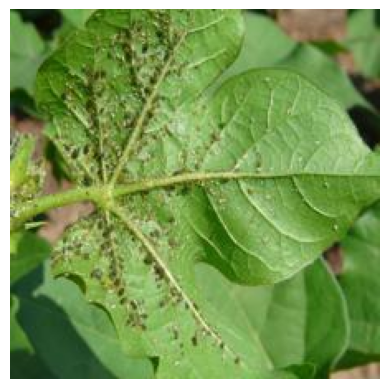

1/1 [==============================] - 5s 5s/step
InceptionV3 Predicted Class: C-Tomato_objectdetect
1/1 [==============================] - 2s 2s/step
MobileNetV2 Predicted Class: C-Tomato_objectdetect


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# creating a object


inception_model_path = '/content/drive/MyDrive/Saved_models/inception_transfer_model.h5'
mobilenet_model_path = '/content/drive/MyDrive/Saved_models/mobilenet_transfer_model.h5'

classes = list(train_generator.class_indices.keys())
# Load the models
# Example for loading InceptionV3 transfer model
inception_loaded_model = tf.keras.models.load_model(inception_model_path)

# Example for loading MobileNetV2 transfer model
mobilenet_loaded_model = tf.keras.models.load_model(mobilenet_model_path)

# Define a function to preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Example usage: Make predictions using the loaded models
# Example image path:
#image_path = '/content/disease/plant_disease/A-Tomato__Early_blight/IMG20220323100125.jpg'
image_path =  '/content/disease/plant_disease/Cotton__Aphids/1.jpg'

# Preprocess the input image
input_image = preprocess_image(image_path)


# Make predictions using InceptionV3 model
inception_predictions = inception_loaded_model.predict(input_image)
inception_predicted_class = np.argmax(inception_predictions)
print("InceptionV3 Predicted Class:", classes[inception_predicted_class])

# Make predictions using MobileNetV2 model
mobilenet_predictions = mobilenet_loaded_model.predict(input_image)
mobilenet_predicted_class = np.argmax(mobilenet_predictions)
print("MobileNetV2 Predicted Class:", classes[mobilenet_predicted_class])


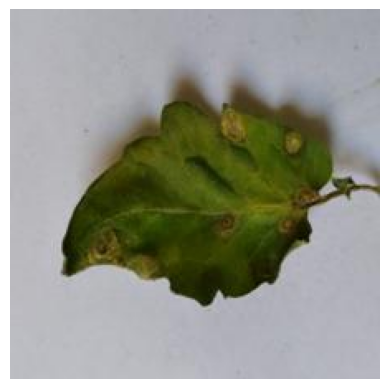

1/1 [==============================] - 0s 27ms/step
InceptionV3 Predicted Class: A-Tomato__Healthy
1/1 [==============================] - 0s 21ms/step
MobileNetV2 Predicted Class: A-Tomato__Spotted Wilt Virus


In [5]:
image_path = '/content/disease/plant_disease/A-Tomato__Early_blight/IMG20220323100125.jpg'
input_image = preprocess_image(image_path)


# Make predictions using InceptionV3 model
inception_predictions = inception_loaded_model.predict(input_image)
inception_predicted_class = np.argmax(inception_predictions)
print("InceptionV3 Predicted Class:", classes[inception_predicted_class])

# Make predictions using MobileNetV2 model
mobilenet_predictions = mobilenet_loaded_model.predict(input_image)
mobilenet_predicted_class = np.argmax(mobilenet_predictions)
print("MobileNetV2 Predicted Class:", classes[mobilenet_predicted_class])

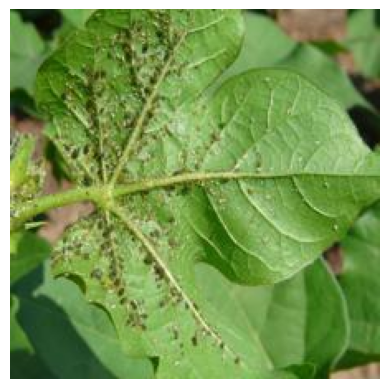

1/1 [==============================] - 0s 25ms/step
InceptionV3 Predicted Class: C-Tomato_objectdetect
InceptionV3 Confidence Score: 0.89161867
1/1 [==============================] - 0s 20ms/step
MobileNetV2 Predicted Class: C-Tomato_objectdetect
MobileNetV2 Confidence Score: 0.94559324


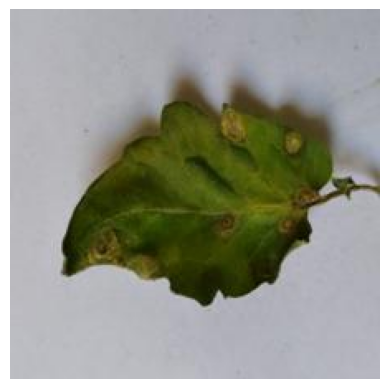

1/1 [==============================] - 0s 27ms/step
InceptionV3 Predicted Class: A-Tomato__Healthy
InceptionV3 Confidence Score: 0.8305638
1/1 [==============================] - 0s 22ms/step
MobileNetV2 Predicted Class: A-Tomato__Spotted Wilt Virus
MobileNetV2 Confidence Score: 0.37831455


In [6]:
# prompt: add confidence score

# Example usage: Make predictions using the loaded models
# Example image path:
#image_path = '/content/disease/plant_disease/A-Tomato__Early_blight/IMG20220323100125.jpg'
image_path =  '/content/disease/plant_disease/Cotton__Aphids/1.jpg'

# Preprocess the input image
input_image = preprocess_image(image_path)


# Make predictions using InceptionV3 model
inception_predictions = inception_loaded_model.predict(input_image)
inception_predicted_class = np.argmax(inception_predictions)
print("InceptionV3 Predicted Class:", classes[inception_predicted_class])
print("InceptionV3 Confidence Score:", inception_predictions[0][inception_predicted_class])

# Make predictions using MobileNetV2 model
mobilenet_predictions = mobilenet_loaded_model.predict(input_image)
mobilenet_predicted_class = np.argmax(mobilenet_predictions)
print("MobileNetV2 Predicted Class:", classes[mobilenet_predicted_class])
print("MobileNetV2 Confidence Score:", mobilenet_predictions[0][mobilenet_predicted_class])

image_path = '/content/disease/plant_disease/A-Tomato__Early_blight/IMG20220323100125.jpg'
input_image = preprocess_image(image_path)


# Make predictions using InceptionV3 model
inception_predictions = inception_loaded_model.predict(input_image)
inception_predicted_class = np.argmax(inception_predictions)
print("InceptionV3 Predicted Class:", classes[inception_predicted_class])
print("InceptionV3 Confidence Score:", inception_predictions[0][inception_predicted_class])

# Make predictions using MobileNetV2 model
mobilenet_predictions = mobilenet_loaded_model.predict(input_image)
mobilenet_predicted_class = np.argmax(mobilenet_predictions)
print("MobileNetV2 Predicted Class:", classes[mobilenet_predicted_class])
print("MobileNetV2 Confidence Score:", mobilenet_predictions[0][mobilenet_predicted_class])
